In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
st_df = pd.read_csv('space_titanic.csv')

st_df.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False


In [3]:
def train_val_test(df, target, seed=42):
    train, val_test = train_test_split(df, train_size=0.7, random_state=seed, stratify=df[target])
    val, test = train_test_split(val_test, train_size=0.5, random_state=seed, stratify=val_test[target])
    return train, val, test

In [4]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
st_df = st_df.dropna()

In [6]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 non-null   object 
 13  Transported   6606 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 729.0+ KB


In [7]:
st_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [8]:
st_df.columns= st_df.columns.str.lower()

In [9]:
st_df['cabin'].value_counts()

G/1476/S    7
E/13/S      7
C/137/S     7
G/734/S     7
B/11/S      7
           ..
E/233/S     1
E/209/P     1
G/548/S     1
D/108/P     1
B/153/P     1
Name: cabin, Length: 5305, dtype: int64

In [10]:
cols_to_drop = ['passengerid','cabin','name']
st_df.drop(columns  = cols_to_drop)

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [11]:
st_df.drop(columns=cols_to_drop, inplace=True)

In [12]:
dummies = pd.get_dummies(st_df[['homeplanet','destination']],drop_first=True)

In [13]:
# axi=1 concats/adds columns
pd.concat([st_df,dummies],axis=1)

,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported,homeplanet_Europa,homeplanet_Mars,destination_PSO J318.5-22,destination_TRAPPIST-1e
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,0,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,1
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,1,0,0,0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0,1,0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,0,0,0,1
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,1,0,0,0


In [14]:
st_df.drop(columns=['homeplanet','destination'],inplace=True)

In [15]:
st_df['transported']=np.where(st_df['transported']==True,'True','False')

In [16]:
st_df.head()

,cryosleep,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [17]:
train,val,test = train_val_test(st_df,'transported')

In [18]:
train.shape,val.shape,test.shape

((4624, 9), (991, 9), (991, 9))

In [19]:
X_train = train.drop(columns = ['transported'])
y_train = train['transported']

In [20]:
X_val = val.drop(columns = ['transported'])
y_val = val['transported']

In [21]:
X_test = test.drop(columns = ['transported'])
y_test = test['transported']

In [22]:
clf = DecisionTreeClassifier(max_depth=3,random_state=42,)

In [23]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [24]:
clf.score(X_train,y_train)

0.7573529411764706

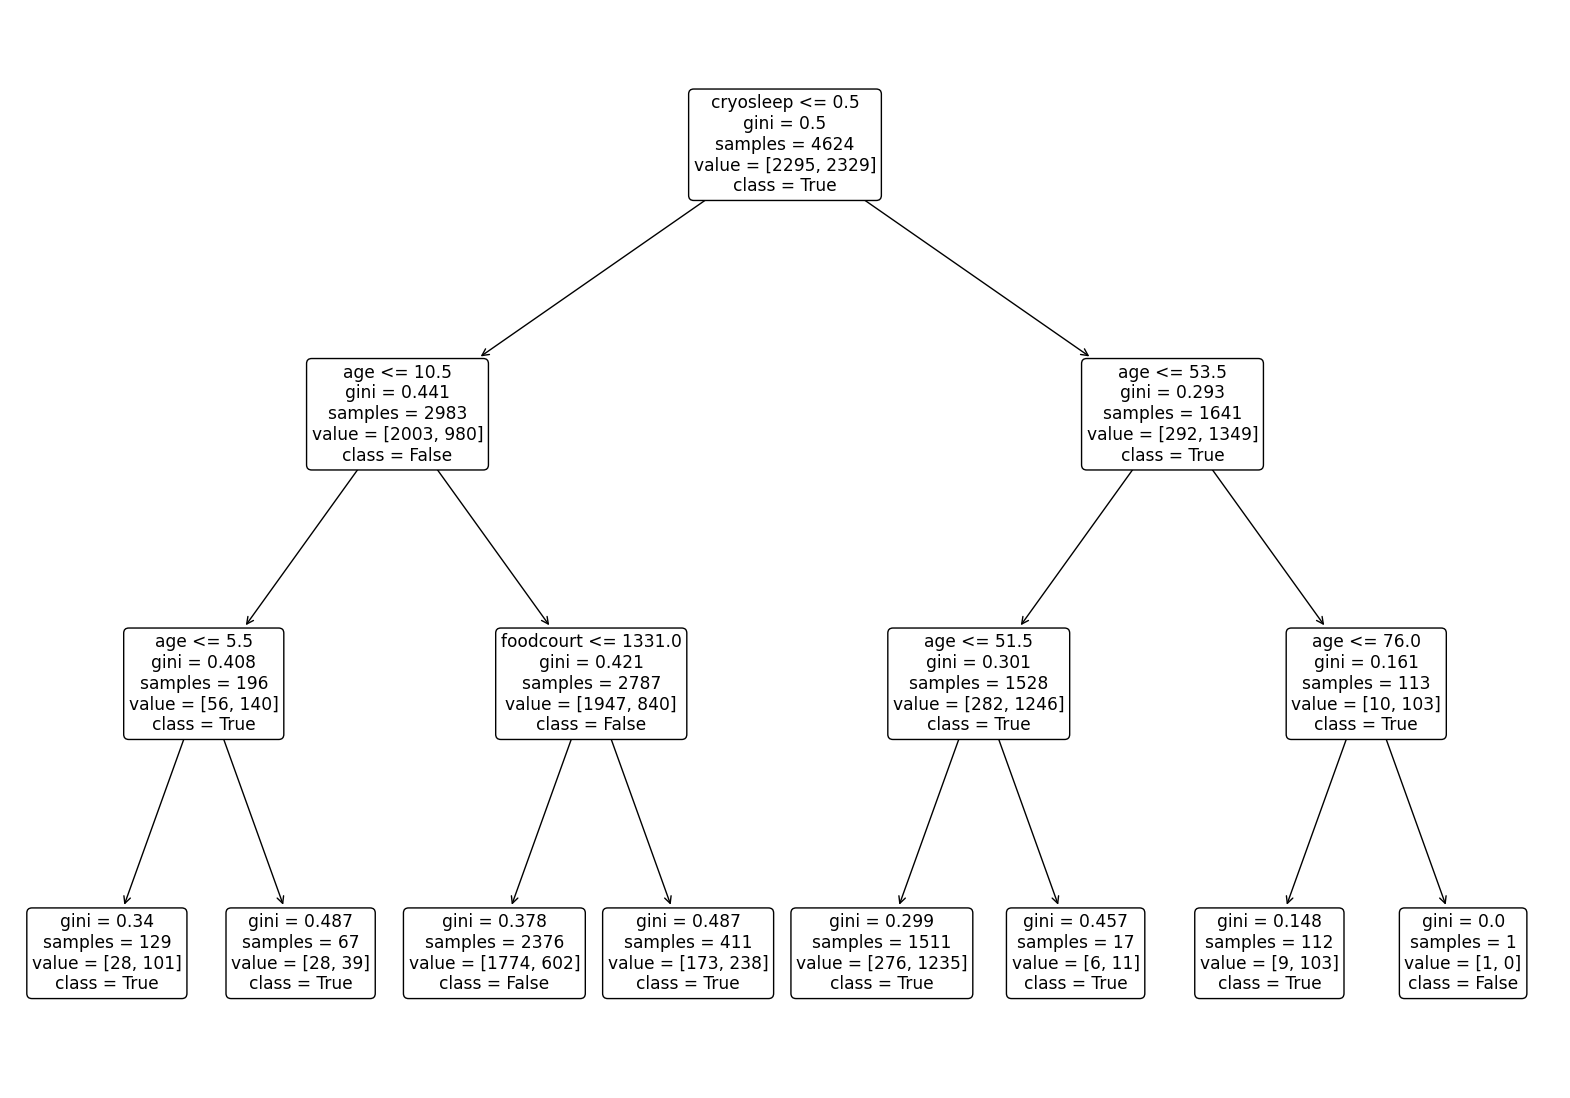

In [25]:
plt.figure(figsize=(20,14))
plot_tree(clf,feature_names=X_train.columns,class_names=clf.classes_,rounded=True)
plt.show()

In [26]:
val_preds = clf.predict(X_val)

In [27]:
print(classification_report(y_val,val_preds))

              precision    recall  f1-score   support

       False       0.72      0.77      0.74       492
        True       0.76      0.71      0.73       499

    accuracy                           0.74       991
   macro avg       0.74      0.74      0.74       991
weighted avg       0.74      0.74      0.74       991



In [28]:
clf.score(X_train,y_train)

0.7573529411764706

In [29]:
big_clf = DecisionTreeClassifier(max_depth=10, random_state=42)

In [30]:
big_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [31]:
big_clf.score(X_train,y_train)

0.8354238754325259

In [32]:
big_clf.score(X_val,y_val)

0.7507568113017155

In [58]:
clf = DecisionTreeClassifier(max_depth=3,random_state=42,)

# Random Forest Version

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
seed=42
rf = RandomForestClassifier(max_depth=3, random_state=seed,
                            max_samples=.5)

In [40]:
# Train on data
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_samples=0.5, random_state=42)

In [41]:
# In sample data
rf.score(X_train,y_train)

0.7432958477508651

In [ ]:
# Out sample data

In [42]:
rf.score(X_val,y_val)

0.7214934409687185

In [43]:
rf.feature_importances_

array([0.31038663, 0.03260656, 0.0007953 , 0.16950888, 0.09249922,
       0.10743421, 0.14275793, 0.14401127])

In [45]:
X_train.columns

Index(['cryosleep', 'age', 'vip', 'roomservice', 'foodcourt', 'shoppingmall',
       'spa', 'vrdeck'],
      dtype='object')

In [46]:
pd.DataFrame({'feature':X_train.columns.to_list(),'importance':rf.feature_importances_})

,feature,importance
0,cryosleep,0.310387
1,age,0.032607
2,vip,0.000795
3,roomservice,0.169509
4,foodcourt,0.092499
5,shoppingmall,0.107434
6,spa,0.142758
7,vrdeck,0.144011


In [47]:
importance_df = pd.DataFrame({'feature':X_train.columns.to_list(),'importance':rf.feature_importances_})

In [49]:
importance_df.sort_values('importance', ascending=False)

,feature,importance
0,cryosleep,0.310387
3,roomservice,0.169509
7,vrdeck,0.144011
6,spa,0.142758
5,shoppingmall,0.107434
4,foodcourt,0.092499
1,age,0.032607
2,vip,0.000795


In [50]:
X_train['vip'].value_counts()

False    4526
True       98
Name: vip, dtype: int64

In [51]:
rf.score(X_val,y_val)

0.7214934409687185

In [53]:
rf2 = RandomForestClassifier(n_estimators=200, max_depth=5,
                            random_state=seed, max_samples=.33)

In [54]:
rf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_samples=0.33, n_estimators=200,
                       random_state=42)

In [55]:
rf2.score(X_train,y_train)

0.7941176470588235

In [56]:
rf2.score(X_val,y_val)

0.7669021190716448

In [57]:
for i in range(3,11):
    rf = RandomForestClassifier(max_depth = i, random_state=seed,
                               max_samples=0.5)
    rf.fit(X_train, y_train)
    
    train_accuracy = rf.score(X_train, y_train)
    
    val_accuracy = rf.score(X_val,y_val)
    
    print(f'Max Depth of {i}. Train Accuracy: {train_accuracy}. Validation Accuracy: {val_accuracy}.')
    print()
    print('-------------')
    print()

Max Depth of 3. Train Accuracy: 0.7432958477508651. Validation Accuracy: 0.7214934409687185.

-------------

Max Depth of 4. Train Accuracy: 0.7703287197231834. Validation Accuracy: 0.7467204843592331.

-------------

Max Depth of 5. Train Accuracy: 0.7936851211072664. Validation Accuracy: 0.7729566094853683.

-------------

Max Depth of 6. Train Accuracy: 0.8125. Validation Accuracy: 0.7790110998990918.

-------------

Max Depth of 7. Train Accuracy: 0.8217993079584776. Validation Accuracy: 0.7769929364278506.

-------------

Max Depth of 8. Train Accuracy: 0.8295847750865052. Validation Accuracy: 0.7759838546922301.

-------------

Max Depth of 9. Train Accuracy: 0.8386678200692042. Validation Accuracy: 0.7780020181634713.

-------------

Max Depth of 10. Train Accuracy: 0.8412629757785467. Validation Accuracy: 0.7759838546922301.

-------------



In [ ]:
# Max Depth of 6 is Best 